In [1]:
#Step 1
!pip install scikit-learn

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib seaborn

In [4]:
!pip install scipy

In [5]:
#Step 2
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

In [6]:
#Step 3
import sys

In [7]:
sys.getrecursionlimit()

3000

In [8]:
sys.setrecursionlimit(3000)

In [9]:
#Step 4
import pandas as pd 
LD = pd.read_excel(r"D:/Loan_D13.xlsx")
LD.head()

,Credit_Policy,Purpose,Ins_Rate,Installment,Annual_Income,DTI,FICO,Days_Wt_Credit_Line,Revol_Balance,Revol_Util,Inq_last_6mths,Delinq_2yrs,Pub_Rec,Not_F_Paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
LD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_Policy        9578 non-null   int64  
 1   Purpose              9578 non-null   object 
 2   Ins_Rate             9578 non-null   float64
 3   Installment          9578 non-null   float64
 4   Annual_Income        9578 non-null   float64
 5   DTI                  9578 non-null   float64
 6   FICO                 9578 non-null   int64  
 7   Days_Wt_Credit_Line  9578 non-null   float64
 8   Revol_Balance        9578 non-null   int64  
 9   Revol_Util           9578 non-null   float64
 10  Inq_last_6mths       9578 non-null   int64  
 11  Delinq_2yrs          9578 non-null   int64  
 12  Pub_Rec              9578 non-null   int64  
 13  Not_F_Paid           9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
#Step 5
percent_missing=round(100*LD.isnull().sum()/len(LD),2)
percent_missing

Credit_Policy          0.0
Purpose                0.0
Ins_Rate               0.0
Installment            0.0
Annual_Income          0.0
DTI                    0.0
FICO                   0.0
Days_Wt_Credit_Line    0.0
Revol_Balance          0.0
Revol_Util             0.0
Inq_last_6mths         0.0
Delinq_2yrs            0.0
Pub_Rec                0.0
Not_F_Paid             0.0
dtype: float64

In [12]:
#Step 6
CD = LD.drop(["Purpose","Not_F_Paid"],axis = 1)
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_Policy        9578 non-null   int64  
 1   Ins_Rate             9578 non-null   float64
 2   Installment          9578 non-null   float64
 3   Annual_Income        9578 non-null   float64
 4   DTI                  9578 non-null   float64
 5   FICO                 9578 non-null   int64  
 6   Days_Wt_Credit_Line  9578 non-null   float64
 7   Revol_Balance        9578 non-null   int64  
 8   Revol_Util           9578 non-null   float64
 9   Inq_last_6mths       9578 non-null   int64  
 10  Delinq_2yrs          9578 non-null   int64  
 11  Pub_Rec              9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


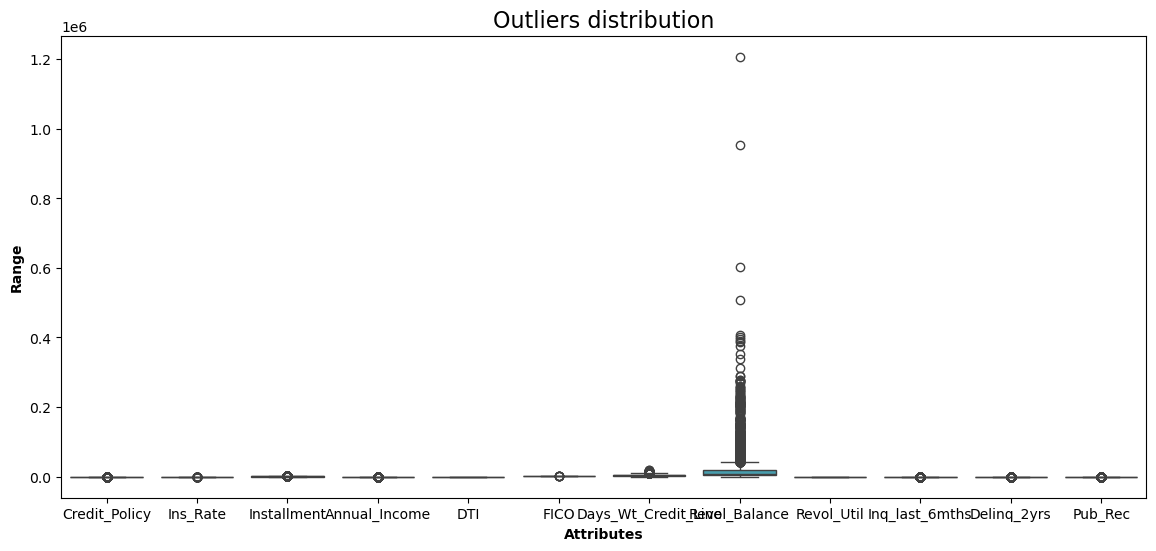

In [13]:
#Step 7
import matplotlib.pyplot as plt
import seaborn as sns
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data=df,orient="v")
    plt.title("Outliers distribution",fontsize=16)
    plt.ylabel("Range",fontweight="bold")
    plt.xlabel("Attributes",fontweight="bold")
show_boxplot(CD)

In [14]:
#Step 8
def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df
        





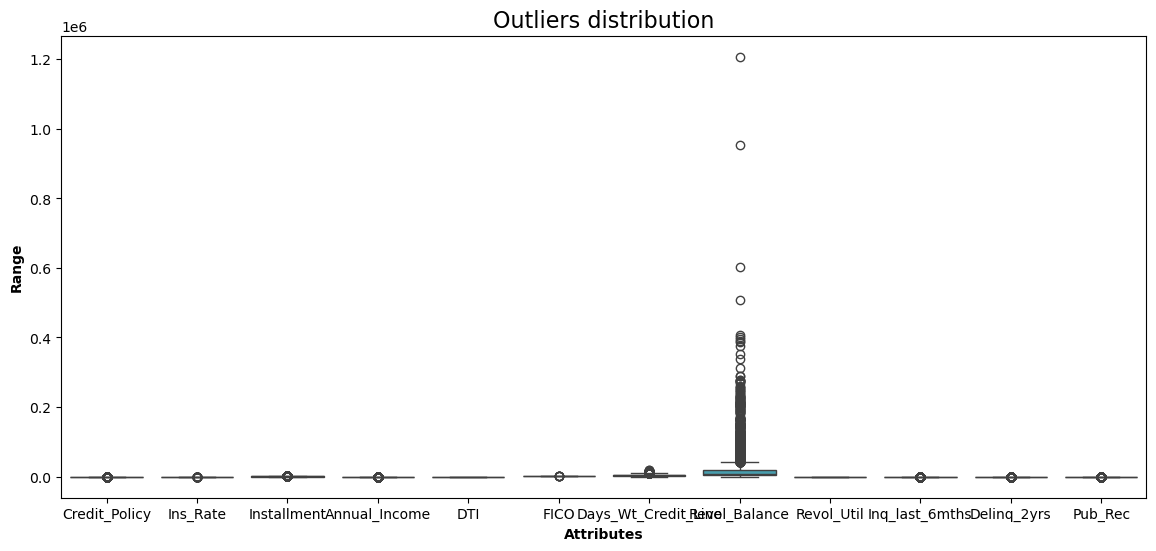

In [15]:
without_outliers = remove_outliers(CD)
show_boxplot(without_outliers)

In [16]:
#Step 10
without_outliers.info()
without_outliers.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_Policy        9578 non-null   int64  
 1   Ins_Rate             9578 non-null   float64
 2   Installment          9578 non-null   float64
 3   Annual_Income        9578 non-null   float64
 4   DTI                  9578 non-null   float64
 5   FICO                 9578 non-null   int64  
 6   Days_Wt_Credit_Line  9578 non-null   float64
 7   Revol_Balance        9578 non-null   int64  
 8   Revol_Util           9578 non-null   float64
 9   Inq_last_6mths       9578 non-null   int64  
 10  Delinq_2yrs          9578 non-null   int64  
 11  Pub_Rec              9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


(9578, 12)

In [17]:
#Step 11
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(9578, 12)

In [18]:
#Step 12 
from scipy.cluster.hierarchy import linkage,dendrogram

complete_clustering =linkage(scaled_data,method = "complete",metric = "euclidean")
average_clustering =linkage(scaled_data,method = "average",metric = "euclidean")
single_clustering =linkage(scaled_data,method = "single",metric = "euclidean")




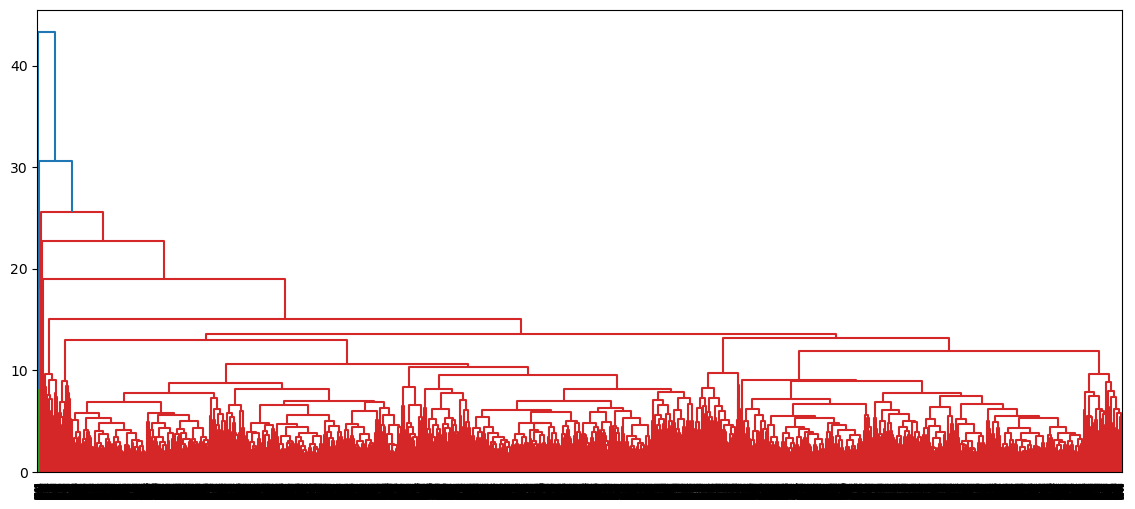

In [19]:
#Step 13
dendrogram(complete_clustering)
plt.show()

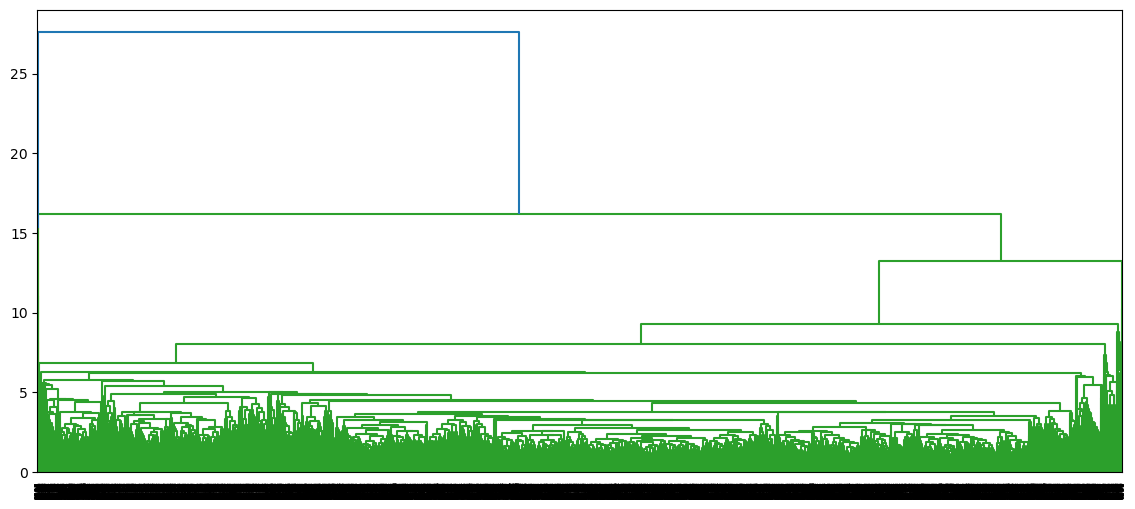

In [20]:
dendrogram(average_clustering)
plt.show()

In [21]:
dendrogram(single_clustering)
plt.show()

RecursionError: maximum recursion depth exceeded

In [ ]:
#Step 14
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))  # Adjust size as needed
sns.boxplot(x="cluster", y="FICO Scores", data=without_outliers)
plt.title("FICO Scores by Cluster")  # Corrected typo
plt.xlabel("Cluster")
plt.ylabel("FICO Score")
plt.show()